<a href="https://colab.research.google.com/github/lmolgalm/routing/blob/master/%D0%AD%D1%84%D1%84%D0%B5%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D1%8B%D0%B5_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp,sqrt
from collections import namedtuple
from functools import lru_cache
import pandas as pd

# Условие задачи
**Пусть есть множество точек $X$ и множество точек $Y$. Пусть гамильтонов путь в полном графе $G = (X, V)$ равен $T$(время). Среднее время обхода графа равно $\frac{T}{len(x)}$. Нужно определить максимальное $Y' \in Y$ , такое что среднее время обхода в новом полном графе $G' = (X+Y', V')$ меньше чем в исходном графе.**


---
Задача является $NPH$ , так как разбивается на две $NP$ сложные задачи: 

1.   Задача коммивояжёра 
2.   Задача о рюкзаке

---


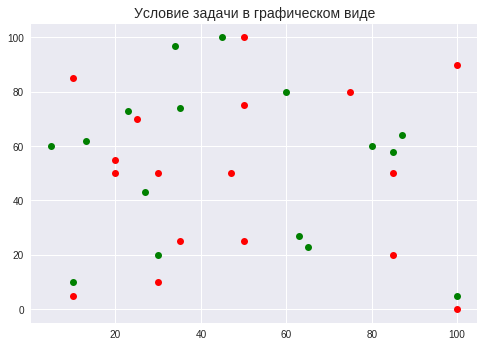

In [0]:
X=[10, 10, 100,100 ,30, 20, 20, 50, 50, 85, 85, 75, 35, 25, 30, 47, 50]
Y=[5, 85, 0,90,50, 55,50,75 ,25,50,20,80,25,70,10,50,100]
X_new=[10, 100,30,  5 , 80, 60 , 45 , 13, 35, 34, 65, 63, 23, 87, 27, 85]
Y_new=[10, 5 ,20, 60 , 60, 80, 100, 62, 74 ,97, 23 ,27, 73, 64, 43,58]    
plt.title('Условие задачи в графическом виде', size=14)
plt.plot(X, Y, color='r', linestyle=' ', marker='o')
plt.plot(X_new, Y_new, color='g', linestyle=' ', marker='o')  
plt.grid(True)
plt.show() 

# Задача коммивояжёра
В задаче коммивояжёра требуется найти минимальный по стоимости гамильтонов Путь
Гамильтонов путь в графе $G$ - это путь, содержащий все вершины графа $G$



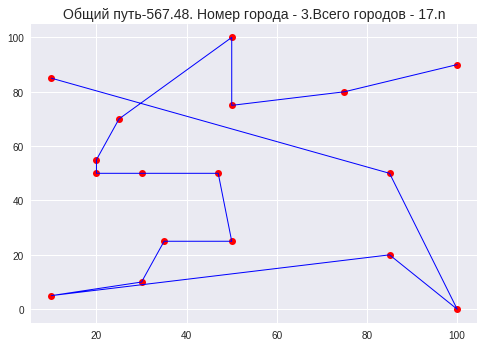

In [0]:
#@Решение коммивояжёра алгоритмом ближайших соседей

#!/usr/bin/env python
#coding=utf8

n=50;m=100;ib=3;way=[];a=0

n=len(X)
M = np.zeros([n,n]) # Шаблон матрицы относительных расстояний между пунктами
for i in np.arange(0,n,1):
         for j in np.arange(0,n,1):
                  if i!=j:
                           M[i,j]=sqrt((X[i]-X[j])**2+(Y[i]-Y[j])**2)# Заполнение матрицы
                  else:
                           M[i,j]=float('inf')#Заполнение главной диагонали матрицы           
way.append(ib)
for i in np.arange(1,n,1):
         s=[]
         for j in np.arange(0,n,1):                  
                  s.append(M[way[i-1],j])
         way.append(s.index(min(s)))# Индексы пунктов ближайших городов соседей
         for j in np.arange(0,i,1):
                  M[way[i],way[j]]=float('inf')
                  M[way[i],way[j]]=float('inf')
S=sum([sqrt((X[way[i]]-X[way[i+1]])**2+(Y[way[i]]-Y[way[i+1]])**2) for i in np.arange(0,n-1,1)])+ sqrt((X[way[n-1]]-X[way[0]])**2+(Y[way[n-1]]-Y[way[0]])**2)                      
plt.title('Общий путь-%s. Номер города - %i.Всего городов - %i.n'%(round(S,3),ib,n), size=14)
X1=[X[way[i]] for i in np.arange(0,n,1)]
Y1=[Y[way[i]] for i in np.arange(0,n,1)]    
plt.plot(X1, Y1, color='r', linestyle=' ', marker='o')
plt.plot(X1, Y1, color='b', linewidth=1)   
X2=[X[way[n-1]],X[way[0]]]
Y2=[Y[way[n-1]],Y[way[0]]]
plt.grid(True)
plt.show() 

# Задача о рюкзаке
В задаче о рюкзаке требуется собрать рюкзак не тяжее, чем $W$ и с наибольшей ценностью. Предметы, которые можно положить в рюкзак имеют свой вес $b_i$ и свою ценность $p_i$. 
формальная постановка задачи:

$$ argmax{\displaystyle \sum _{i=1}^{n}v_{i}x_{i}}$$
с ограничениями$$ {\displaystyle \sum _{i=1}^{n}w_{i}x_{i}\leq W}$$


Задача о рюкзаке решается динамическим программированием за $\tilde O(N \cdot M) $ , где $N$- размер множества вещей для рюкзака. а $M$ - максимальный вес рюкзака


In [0]:
#@Решение задачи о рюкзаке динамическим программированием

#!/usr/bin/env python3
"""0-1 knapsack problem: O(n W) in time, space algorithm"""


Item = namedtuple('Item', 'value weight')
items = Item(4, 5), Item(3, 4), Item(3, 2), Item(2, 1)
capacity = 6  # max weight we can put into the knapsack


@lru_cache(maxsize=None)  # cache all calls
def best_value(nitems, weight_limit):
    if nitems == 0:  # no items
        return 0  # zero value
    elif items[nitems - 1].weight > weight_limit:
        # new item is heavier than the current weight limit
        return best_value(nitems - 1, weight_limit)  # don't include new item
    else:
        return max(  # max of with and without the new item
            best_value(nitems - 1, weight_limit),  # without
            best_value(nitems - 1, weight_limit - items[nitems - 1].weight)
            + items[nitems - 1].value)  # with the new item


result = []
weight_limit = capacity
for i in reversed(range(len(items))):
    if best_value(i + 1, weight_limit) > best_value(i, weight_limit):
        # better with the i-th item
        result.append(items[i])  # include it in the result
        weight_limit -= items[i].weight
print(result)
print(best_value.cache_info())

[Item(value=3, weight=2), Item(value=3, weight=4)]
CacheInfo(hits=9, misses=21, maxsize=None, currsize=21)


Для сведения задачи о рюкзаке к исходной задаче необходимо использовать более сложную постановку задачи, а именно нелинейную задачу о суммах подмножеств:

Пусть вектор${\displaystyle x=(x_{1},..,x_{n})\in \mathbb {R} ^{n}}$  определяет количество экземпляров каждого предмета в рюкзаке. 

Тогда задача состоит в нахождении минимума функции

$${\displaystyle \min _{x\in S}\ f(x)} ,$$

при заданном ограничении:

$${\displaystyle g(x)\leq b} $$


Если $f(x)$ - среднее время обхода всех точек в  графе, а $g(x) = f(x)$ - не должно превышать исходного среднего времени обхода, то задаче о рюкзаке сводится к исходной задаче.

# Приближенное решение исходной задачи
Текущая задача может решаться жадно:

Пусть мы знаем среднее время обхода начальных точек $T_a$. Тогда отберем все точки в графе $Y$, лежашие не дальше $T_a$ . Получим новое множество $Y_n$ . Будем добавлять по очереди точки из $Y_n$ в исходный граф ( с возвращением) и смотреть насколько изменится время обхода. Получим для каждой точки из $y_i \in Y_n$ значение $t_i$, равное добавному времени. Отсортируем все точки по возрастанию значения $t_i$.






Теперь добавляем в исходный граф по очереди точки $y_i \in Y_n$ в порядке сортировки, пока среднее значение времени не увеличивается. В общем случае нужно каждый раз после добавления новой точки $y_i \in Y_n$  пересчитывать значения $t_i$. Но в случае, если новые точки лежат разрежено вдоль основного пути (то есть расстояние между всеми точками и точкой $i$ больше чем $t_i$ , то этим пунктом можно принебречь)



Полученное множество будет ответом на задачу. Сложность данного алгоритма варьируется от $\tilde O (m)$ до $\tilde O (m^2)$, где $m$ - размер множества $Y$.


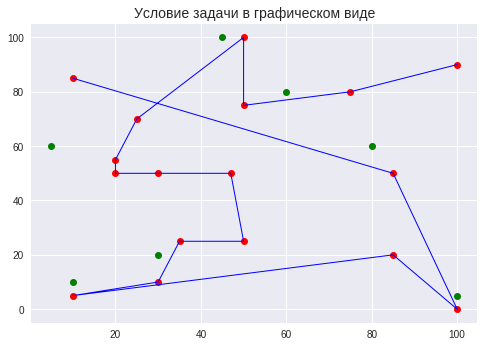

In [0]:
                
plt.title('Условие задачи в графическом виде', size=14)
X1=[X[way[i]] for i in np.arange(0,n,1)]
Y1=[Y[way[i]] for i in np.arange(0,n,1)]   
plt.plot(X1, Y1, color='r', linestyle=' ', marker='o')
plt.plot(X1, Y1, color='b', linewidth=1)  
plt.plot(X_new, Y_new, color='g', linestyle=' ', marker='o')  
X2=[X[way[n-1]],X[way[0]]]
Y2=[Y[way[n-1]],Y[way[0]]]
plt.grid(True)
plt.show() 

Докажем от противного точность решения в случае разряженного множества Y:

Пусть существует оптимальное множество $y'_i \in Y''$ отличное от полученного множества $Y'$. Среднее время обхода оптимального множества равно $T'_a$

Пусть $y_i \in Y'$ , $y_1$ - точка с наименьшим $t$. Если она не входит в $Y''$, то добавление её уменьшит значение среднего времени обхода, значит $Y''$ не самое оптимальное подможество. Значит $y_1 = y'_1$
![alt text](https://downloader.disk.yandex.ru/preview/ba3a68780e9f176aa6b63f74a81f15c2c2e647bee59898ee0759eefe23cd6472/5c1d025d/TRzxBCX-7XfWSZY23qN5-3XwPHZSRUspHVyS9H-nh0K8FIOwPYULjDHfYkKV1iZ3GVdCII_4NpglOXZPqIprbg%3D%3D?uid=0&filename=2018-12-21_14-09-50.png&disposition=inline&hash=&limit=0&content_type=image%2Fpng&tknv=v2&size=2048x2048)

Пусть $y'_2 $ отличается от $y_2$, значит $t'_2 > t_2$ по построению. Значит, если заменить $y'_2$ на $y_2$, то среднее время обхода уменьшиться, что противоречит гипотезе о оптимальности $Y'$. 

Применяя последовательно данное рассуждение к каждой точке, получаем, что $Y'' = Y$ $\blacktriangle$

**При доказательстве сделанно допущение, что добавление новой точки не меняет значение предыдущих $t$ , что в общем случае конечно не верно. Но на картографических разряженных заданиях можно принебречь данным допущением**

# Решение исходной задачи жадным алгоритмом

In [0]:
#@Решение исходной задачи жадным алгоритмом

#!/usr/bin/env python
#coding=utf8

n=50;m=100;ib=0;

X_x=[10, 10, 100,100 ,30, 20, 20, 50, 50, 85, 85, 75, 35, 25, 30, 47, 50]
Y_x=[5, 85, 0,90,50, 55,50,75 ,25,50,20,80,25,70,10,50,100]
X_new=[10, 100,30,  5 , 80, 60 , 13, 35, 65, 63, 23, 87, 27, 85]
Y_new=[10, 5 ,20, 60 , 60, 80, 62, 74 , 23 ,27, 73, 64, 43,58]   

T = []
T_old = 0
def mintime(X, Y):
  way=[];a=0
  n=len(X)
  M = np.zeros([n,n]) # Шаблон матрицы относительных расстояний между пунктами
  for i in np.arange(0,n,1):
           for j in np.arange(0,n,1):
                    if i!=j:
                             M[i,j]=sqrt((X[i]-X[j])**2+(Y[i]-Y[j])**2)# Заполнение матрицы
                    else:
                             M[i,j]=float('inf')#Заполнение главной диагонали матрицы           
  way.append(ib)
  for i in np.arange(1,n,1):
           s=[]
           for j in np.arange(0,n,1):                  
                    s.append(M[way[i-1],j])
           way.append(s.index(min(s)))# Индексы пунктов ближайших городов соседей
           for j in np.arange(0,i,1):
                    M[way[i],way[j]]=float('inf')
                    M[way[i],way[j]]=float('inf')
  S=sum([sqrt((X[way[i]]-X[way[i+1]])**2+(Y[way[i]]-Y[way[i+1]])**2) for i in np.arange(0,n-1,1)])+ sqrt((X[way[n-1]]-X[way[0]])**2+(Y[way[n-1]]-Y[way[0]])**2)                      
  return S , way
  
T_x , way = mintime(X_x, Y_x)
#print(T_x)
for i in range(len(X_new)):
  S_new , way = mintime(X_x + [X_new[i]], Y_x + [Y_new[i]])
#  print(S_new)
  T.append(S_new-T_x)
  if S_new-T_x < 0 :
    X_plot =X_x + [X_new[i]]
    Y_plot = Y_x + [Y_new[i]]
    X1=[X_plot[way[i]] for i in np.arange(0,n,1)]
    Y1=[Y_plot[way[i]] for i in np.arange(0,n,1)]   
    plt.plot(X1, Y1, color='r', linestyle=' ', marker='o')
    plt.plot(X1, Y1, color='b', linewidth=1)  
    plt.plot(X_new, Y_new, color='g', linestyle=' ', marker='o')  
    plt.grid(True)
    plt.show() 
    
    
print('Array of t_i : ', T)

Array of t_i :  [4.384471871911728, 1.2132034355963697, 1.2596795110235917, 31.698206214313018, 85.80542739812688, 93.9069763291659, 8.510311737625784, 77.01476844566866, 139.16757953947308, 140.05082437209114, 0.08415385282171428, 88.15169500627053, 7.5152680424755545, 86.17565132972868]


Начальное среднее значение :  26.98012746362339
Итерация 0 : среднее значение равно 25
Итерация 1 : среднее значение равно 24
Итерация 2 : среднее значение равно 27
Итоговое среднее значение :  24.540083619836572


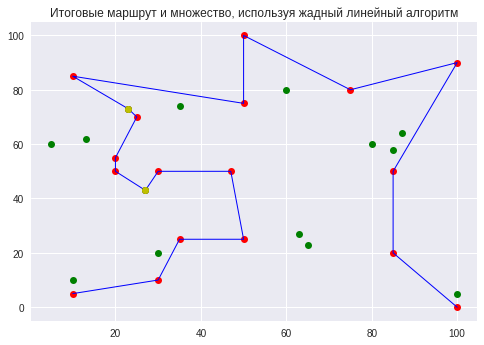

In [0]:

s = pd.Series(T).sort_values(ascending=False)

X_sorted = [x for _ ,x in sorted(zip(s.index.tolist(),X_new))]
Y_sorted = [x for _ ,x in sorted(zip(s.index.tolist(),Y_new))]
Average_old = T_x / len(X_x)
Average_cur = T_x / len(X_x) 
X_cur = X_x
Y_cur = Y_x
i = 0
print('Начальное среднее значение : ', Average_old)
while True:
    X_cur = X_cur + [X_sorted[i]]
    Y_cur = Y_cur + [Y_sorted[i]]
    S_new, way = mintime(X_cur, Y_cur)
    print('Итерация %i : среднее значение равно %i'%(i, S_new/ len(X_cur)))
    av_prom = S_new / len(X_cur)
    i += 1
    if Average_cur < av_prom:
      break
    else:
      Average_cur = av_prom

print('Итоговое среднее значение : ', Average_cur)
final_l = i


X_print = X_x + X_sorted[:final_l-1]
Y_print = Y_x + Y_sorted[:final_l-1]
S, way = mintime(X_print, Y_print)
n=len(X_print)
X1 =[X_print[way[i]] for i in np.arange(0,n,1)]
Y1=[Y_print[way[i]] for i in np.arange(0,n,1)]   
plt.title('Итоговые маршрут и множество, используя жадный линейный алгоритм')
plt.plot(X1, Y1, color='r', linestyle=' ', marker='o')
plt.plot(X1, Y1, color='b', linewidth=1) 
plt.plot(X_new, Y_new, color='g', linestyle=' ', marker='o')  
plt.plot(X_sorted[:final_l-1], Y_sorted[:final_l-1],color='y', linestyle=' ', marker='o') 
plt.grid(True)
plt.show() 

